In [1]:
print("hello")

hello


In [2]:
import os
# from ms2deepscore.MS2DeepScore import MS2DeepScore
# from ms2deepscore.models.load_model import load_model
from matchms.importing.load_from_mgf import load_from_mgf
from ms2deepscore.utils import load_pickled_file



In [14]:
from ms2deepscore.benchmarking.select_spectrum_pairs_for_visualization import sample_spectra_multiple_times
import numpy as np

def load_and_sample_validation_results(folder):
    pos_spectra = list(load_from_mgf(os.path.join(data_folder, folder, "training_and_validation_split", "positive_validation_spectra.mgf")))

    trained_models_folder = os.path.join(data_folder, folder, "trained_models")

    trained_models = os.listdir(trained_models_folder)
    assert len(trained_models) == 1

    pos_true_values = load_pickled_file(os.path.join(trained_models_folder, trained_models[0], "benchmarking_results", "positive_positive_true_values.pickle"))
    pos_predictions = load_pickled_file(os.path.join(trained_models_folder, trained_models[0], "benchmarking_results", "positive_positive_predictions.pickle"))
    
    np.random.seed(42)
    sampled_both_modes, combined_true_values = sample_spectra_multiple_times(val_spectra=pos_spectra,
                                                          val_spectra_other_mode=pos_spectra,
                                                          predicted_values=pos_predictions,
                                                          true_values=pos_true_values,
                                                          nr_of_sample_times=10)
    return sampled_both_modes, combined_true_values

Sampling 1 spectrum per inchikey (multiple times): 100%|██████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:05<00:00,  1.52it/s]


In [15]:
data_folder = os.path.join("../../../data/tensorflow/runs_matchms_cleaned/")
folder = "gnps_21_08_23_cleaned_for_ms2deepscore"
both_predictions_3_2, both_true_values_3_2 = load_and_sample_validation_results(folder)

folder = "gnps_21_08_23_min_10_at_10_percent"
both_predictions_10_10, both_true_values_10_10 = load_and_sample_validation_results(folder)

folder = "gnps_21_08_23_min_10_at_3_percent"
both_predictions_10_3, both_true_values_10_3 = load_and_sample_validation_results(folder)

folder = "gnps_21_08_23_min_3_at_10_percent"
both_predictions_3_10, both_true_values_3_10 = load_and_sample_validation_results(folder)

folder = "gnps_21_08_23_min_3_at_20_percent"
both_predictions_3_20, both_true_values_3_20 = load_and_sample_validation_results(folder)

folder = "gnps_21_08_23_min_3_at_5_percent"
both_predictions_3_5, both_true_values_3_5 = load_and_sample_validation_results(folder)

folder = "gnps_21_08_23_min_5_at_10_percent"
both_predictions_5_10, both_true_values_5_10 = load_and_sample_validation_results(folder)

folder = "gnps_21_08_23_min_5_at_20_percent"
both_predictions_5_20, both_true_values_5_20 = load_and_sample_validation_results(folder)

folder = "gnps_21_08_23_min_5_at_2_percent"
both_predictions_5_2, both_true_values_5_2 = load_and_sample_validation_results(folder)

folder = "gnps_21_08_23_min_5_at_5_percent"
both_predictions_5_5, both_true_values_5_5 = load_and_sample_validation_results(folder)


Sampling 1 spectrum per inchikey (multiple times): 100%|██████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:05<00:00,  1.51it/s]
Sampling 1 spectrum per inchikey (multiple times): 100%|██████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:01<00:00,  7.31it/s]
Sampling 1 spectrum per inchikey (multiple times): 100%|██████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:02<00:00,  4.23it/s]
Sampling 1 spectrum per inchikey (multiple times): 100%|██████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:04<00:00,  2.12it/s]
Sampling 1 spectrum per inchikey (multiple times): 100%|██████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:03<00:00,  2.48it/s]
Sampling 1 spectrum per inchikey (multiple times): 100%|███████████████████

In [23]:
import numpy as np
from matplotlib import pyplot as plt
from ms2deepscore.models.loss_functions import bin_dependent_losses
from ms2deepscore.benchmarking.plot_rmse_per_bin import plot_rmse_per_bin

def plot_rmse_per_bin_multiple_benchmarks(list_of_predicted_scores,
                                          list_of_true_values,
                                          labels,
                                          ref_score_bins=np.array([(x / 10, x / 10 + 0.1) for x in range(0, 10)])):
    """Combines the plot of multiple comparisons into one plot

    """
    if not len(list_of_true_values) == len(list_of_true_values) == len(labels):
        raise ValueError("The number of predicted scores and true values should be equal.")
    fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True,
                                   figsize=(8, 6), dpi=120)
    for i, true_values in enumerate(list_of_true_values):
        bin_content, bounds, losses = bin_dependent_losses(
            list_of_predicted_scores[i],
            true_values,
            ref_score_bins,
            loss_types=["rmse"]
            )
        rmses = losses["rmse"]
        ax1.plot(np.arange(len(rmses)), rmses, "o:")
        ax2.plot(np.arange(len(rmses)), bin_content, "o:")
    fig.legend(labels, loc="center right")
    ax1.set_title('RMSE')
    ax1.set_ylabel("RMSE")
    ax1.grid(True)
    ax1.set_ylim((0.1, 0.4))

    ax2.set_title('# of spectrum pairs')
    ax2.set_ylabel("# of spectrum pairs")
    ax2.set_xlabel("Tanimoto score bin")
    ax2.set_ylim(bottom=0)
    plt.xticks(np.arange(len(ref_score_bins)),
               [f"{a:.1f} to < {b:.1f}" for (a, b) in bounds], fontsize=9, rotation='vertical')
    ax2.grid(True)
    plt.tight_layout(rect=[0, 0, 0.75, 1])

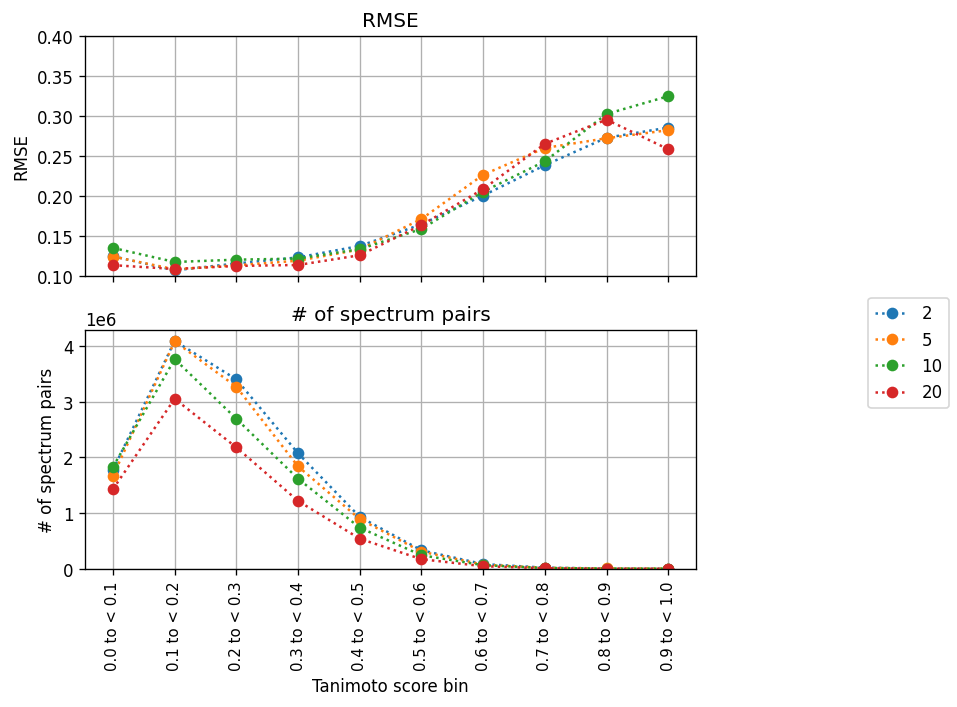

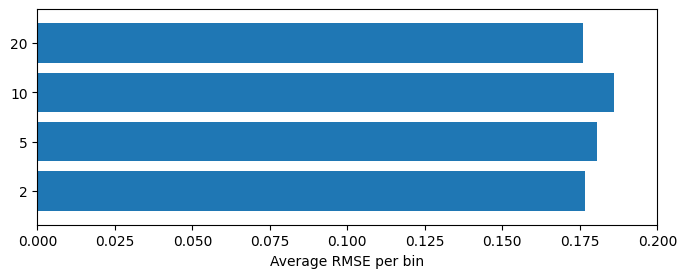

In [26]:
plot_rmse_per_bin_multiple_benchmarks(
    [both_predictions_3_2, 
     both_predictions_3_5, 
     both_predictions_3_10, 
     both_predictions_3_20,], 
    [both_true_values_3_2, 
     both_true_values_3_5, 
     both_true_values_3_10, 
     both_true_values_3_20], 
    [ "2", "5", "10", "20",])
plt.show()
plot_average_rmse_per_bin(    
    [both_predictions_3_2, 
     both_predictions_3_5, 
     both_predictions_3_10, 
     both_predictions_3_20,], 
    [both_true_values_3_2, 
     both_true_values_3_5, 
     both_true_values_3_10, 
     both_true_values_3_20], 
    [ "2", "5", "10", "20",])

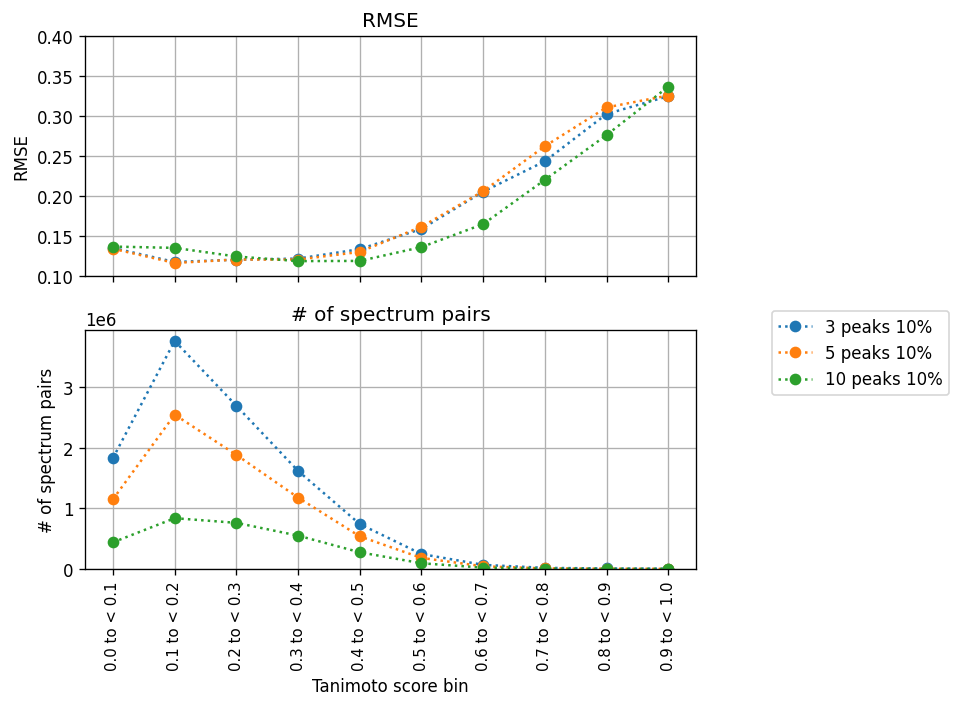

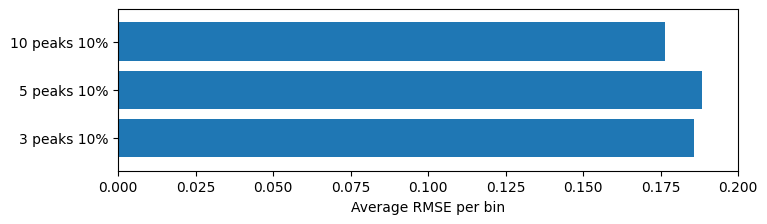

In [30]:
plot_rmse_per_bin_multiple_benchmarks(
    [both_predictions_3_10, 
     both_predictions_5_10,
     both_predictions_10_10], 
    [both_true_values_3_10, 
     both_true_values_5_10, both_true_values_10_10], 
    ["3 peaks 10%","5 peaks 10%","10 peaks 10%"])
plt.show()
plot_average_rmse_per_bin(    
    [both_predictions_3_10, 
     both_predictions_5_10,
     both_predictions_10_10], 
    [both_true_values_3_10, 
     both_true_values_5_10,both_true_values_10_10], 
    ["3 peaks 10%","5 peaks 10%","10 peaks 10%"])

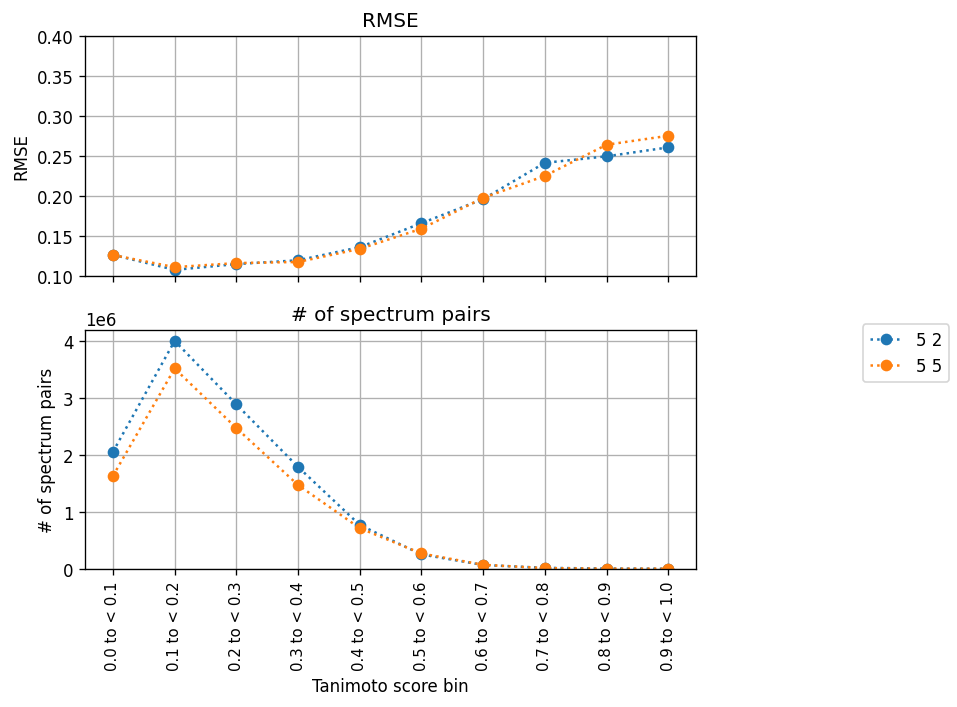

In [31]:
plot_rmse_per_bin_multiple_benchmarks(
    [both_predictions_5_2, 
     both_predictions_5_5], 
    [both_true_values_5_2, 
     both_true_values_5_5], 
    [ "5 2", "5 5"])
plt.show()
# plot_average_rmse_per_bin(    
#     [both_predictions_3_2, 
#      both_predictions_3_5, 
#      both_predictions_3_10, 
#      both_predictions_3_20,], 
#     [both_true_values_3_2, 
#      both_true_values_3_5, 
#      both_true_values_3_10, 
#      both_true_values_3_20], 
#     [ "2", "5", "10", "20",])

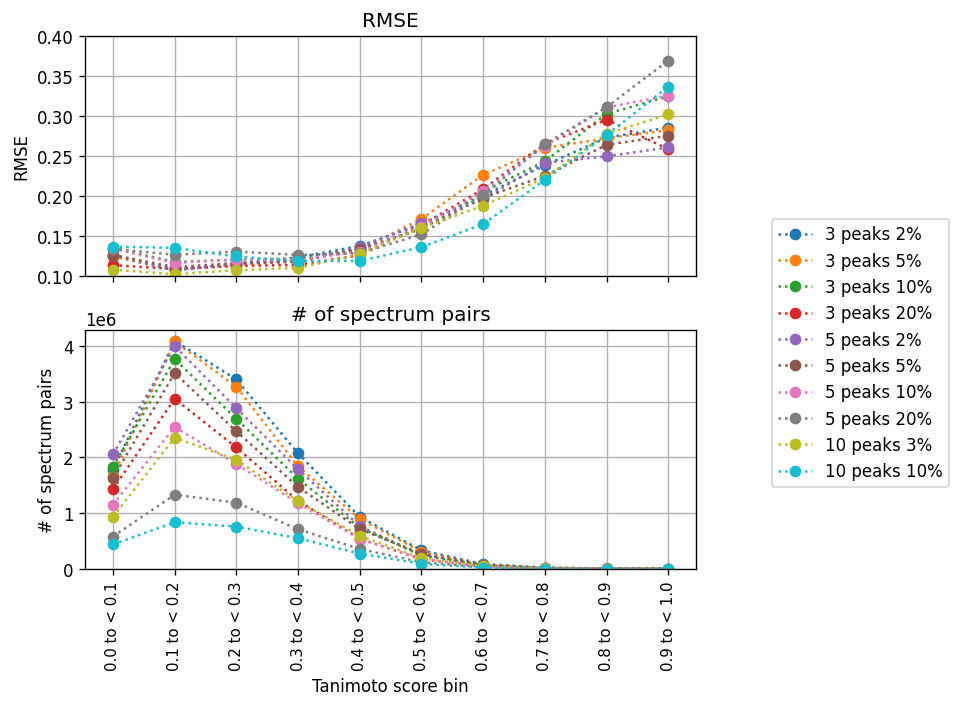

In [24]:
plot_rmse_per_bin_multiple_benchmarks(
    [both_predictions_3_2, 
     both_predictions_3_5, 
     both_predictions_3_10, 
     both_predictions_3_20,
     both_predictions_5_2, both_predictions_5_5, both_predictions_5_10, both_predictions_5_20, both_predictions_10_3, both_predictions_10_10], 
    [both_true_values_3_2, 
     both_true_values_3_5, 
     both_true_values_3_10, 
     both_true_values_3_20, both_true_values_5_2, both_true_values_5_5, both_true_values_5_10, both_true_values_5_20, both_true_values_10_3, both_true_values_10_10], 
    ["3 peaks 2%", "3 peaks 5%", "3 peaks 10%", "3 peaks 20%", "5 peaks 2%", "5 peaks 5%", "5 peaks 10%", "5 peaks 20%", "10 peaks 3%", "10 peaks 10%"])

In [ ]:
plot_rmse_per_bin_multiple_benchmarks(
    [both_predictions_3_2, 
     both_predictions_3_5, 
     both_predictions_3_10, 
     both_predictions_3_20,
     both_predictions_5_2, both_predictions_5_5, both_predictions_5_10, both_predictions_5_20, both_predictions_10_3, both_predictions_10_10], 
    [both_true_values_3_2, 
     both_true_values_3_5, 
     both_true_values_3_10, 
     both_true_values_3_20, both_true_values_5_2, both_true_values_5_5, both_true_values_5_10, both_true_values_5_20, both_true_values_10_3, both_true_values_10_10], 
    ["3 peaks 2%", "3 peaks 5%", "3 peaks 10%", "3 peaks 20%", "5 peaks 2%", "5 peaks 5%", "5 peaks 10%", "5 peaks 20%", "10 peaks 3%", "10 peaks 10%"])

In [33]:
import numpy as np
from matplotlib import pyplot as plt
from ms2deepscore.models.loss_functions import bin_dependent_losses
from ms2deepscore.benchmarking.plot_rmse_per_bin import plot_rmse_per_bin

def plot_average_rmse_per_bin(list_of_predicted_scores,
                                          list_of_true_values,
                                          labels,
                                          ref_score_bins=np.array([(x / 10, x / 10 + 0.1) for x in range(0, 10)]), 
                              standard_model_index=0):
    """Combines the plot of multiple comparisons into one plot

    """
    if not len(list_of_true_values) == len(list_of_true_values) == len(labels):
        raise ValueError("The number of predicted scores and true values should be equal.")

    average_rmses = []
    
    for i, true_values in enumerate(list_of_true_values):
        bin_content, bounds, losses = bin_dependent_losses(
            list_of_predicted_scores[i],
            true_values,
            ref_score_bins,
            loss_types=["rmse"]
            )
        rmses = losses["rmse"]
        average_rmse = sum(rmses)/len(rmses)
        average_rmses.append(average_rmse)
    fig, ax = plt.subplots(figsize=(8, 0.7 * len(labels)))  # Adjust figure size based on number of bars
    
    bars = ax.barh(labels, average_rmses, height=0.8)
    bars[standard_model_index].set_color('green')  # Set color for a specific bar
    ax.set_yticks(range(len(labels)))
    ax.set_yticklabels(labels)
    ax.set_xlabel("Average RMSE per bin")
    ax.set_xlim((0, 0.2))
    ax.margins(y=0.3/len(labels))

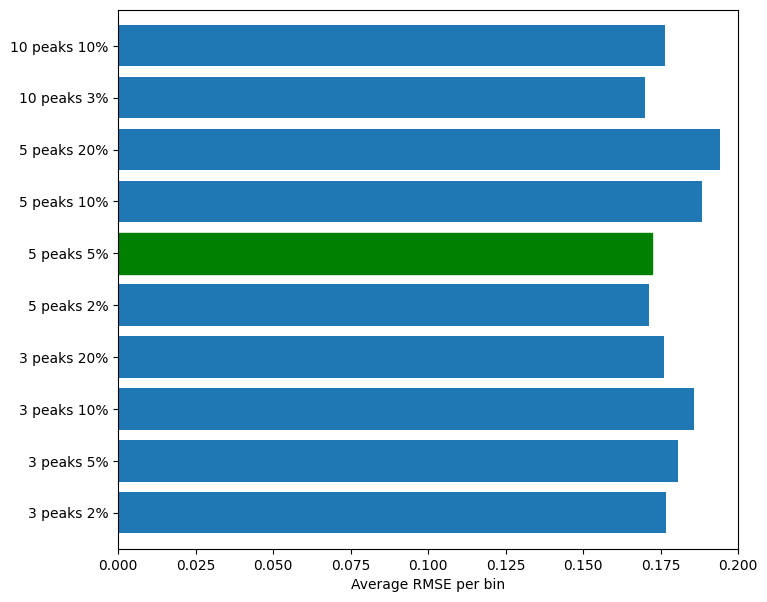

In [34]:
plot_average_rmse_per_bin(
    [both_predictions_3_2, 
     both_predictions_3_5, 
     both_predictions_3_10, 
     both_predictions_3_20,
     both_predictions_5_2, both_predictions_5_5, both_predictions_5_10, both_predictions_5_20, both_predictions_10_3, both_predictions_10_10], 
    [both_true_values_3_2, 
     both_true_values_3_5, 
     both_true_values_3_10, 
     both_true_values_3_20, both_true_values_5_2, both_true_values_5_5, both_true_values_5_10, both_true_values_5_20, both_true_values_10_3, both_true_values_10_10], 
    ["3 peaks 2%", "3 peaks 5%", "3 peaks 10%", "3 peaks 20%", "5 peaks 2%", "5 peaks 5%", "5 peaks 10%", "5 peaks 20%", "10 peaks 3%", "10 peaks 10%"],
standard_model_index=5)